In [134]:
import numpy as np
import pandas as pd
import re, nltk

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../sentimentos/data/train/Train3Classes.csv')
test = pd.read_csv('../sentimentos/data/subm/Subm3Classes.csv')

print(train.shape)
print(test.shape)

(95000, 5)
(5000, 4)


In [3]:
train.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:)


In [4]:
test.head()

,id,tweet_text,tweet_date,query_used
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:)
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:)
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:)
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:)


In [5]:
train.isnull().any()
test.isnull().any()

id            False
tweet_text    False
tweet_date    False
query_used    False
dtype: bool

In [7]:
# checando comentários negativos do dataset de treino
train[train['sentiment'] == 0].head(10)

,id,tweet_text,tweet_date,sentiment,query_used
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(
8,1046768079349403648,@abreujaviera Amigaa :(,Mon Oct 01 14:25:32 +0000 2018,0,:(
10,1046931349075058688,@uttsrenjun ai n da eu to mto apaixonada no re...,Tue Oct 02 01:14:19 +0000 2018,0,:(
11,1049319546656575489,QUERIA ATÉ GRAVAR REACTION PRO YOUTUBE MAS NAO...,Mon Oct 08 15:24:09 +0000 2018,0,:(
16,1049148654718779392,@javiercosmico Cuidado con andar controlando g...,Mon Oct 08 04:05:06 +0000 2018,0,:(
18,1046937038564548608,@kdkelv pena que não surge efeito :(,Tue Oct 02 01:36:55 +0000 2018,0,:(
23,1046927580429996033,passar por essas situaçõezinhas faz a gente ve...,Tue Oct 02 00:59:20 +0000 2018,0,:(
26,1046915983523360769,@GrrrlPwrrr Ahh entendi :(( mas vamo marcar um...,Tue Oct 02 00:13:15 +0000 2018,0,:(
27,1049220083002826753,@captwinmarvel ta mesmo :(,Mon Oct 08 08:48:56 +0000 2018,0,:(


In [10]:
# checando comentários positivos do dataset de treino
train[train['sentiment'] == 1].head(10)

,id,tweet_text,tweet_date,sentiment,query_used
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:)
5,1046774830857695232,@ppolkiss Parabéns moço :D,Mon Oct 01 14:52:22 +0000 2018,1,:)
7,1046740081090981889,"A coleção aumentou, mas o espaço do quaro ""dim...",Mon Oct 01 12:34:17 +0000 2018,1,:)
9,1046760775182888961,fiquei exatos 45 minutos tentando conectar meu...,Mon Oct 01 13:56:31 +0000 2018,1,:)
13,1046774775102820352,@pandlernews @theffame é ciro ou nulo :),Mon Oct 01 14:52:09 +0000 2018,1,:)
19,1045422304526827520,Olhem amanhã só entro às 15:15 :),Thu Sep 27 21:17:55 +0000 2018,1,:)
20,1045462190814310401,@DiorFgomes @Teledramaturgia Exato! Minha perg...,Thu Sep 27 23:56:24 +0000 2018,1,:)
21,1045371821669994496,@nathidmello me ajuda :),Thu Sep 27 17:57:19 +0000 2018,1,:)
25,1047473075829137409,Hoje acordei mais feliz do que o Jay-Z. :) htt...,Wed Oct 03 13:06:57 +0000 2018,1,:)
32,1047326315391713280,Venham de patati patazaperson q explico direit...,Wed Oct 03 03:23:46 +0000 2018,1,:)


<AxesSubplot:title={'center':'Número para cada sentimento'}>

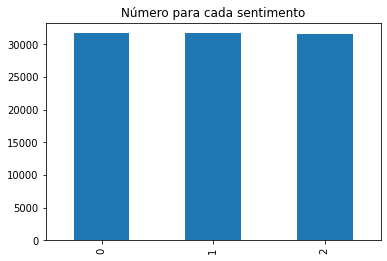

In [53]:
train['sentiment'].value_counts().plot.bar(title='Número para cada sentimento', figsize = (6, 4))

Ao olhar o gráfico acima, podemos perceber que o datset está bem distribuído entre comentários positivos, negativos e neutros

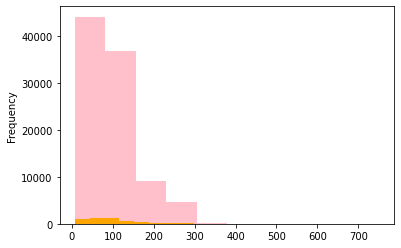

In [15]:
# verificando a distribuição de tweets nos dados

length_train = train['tweet_text'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet_text'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [16]:
# adicionando uma coluna para representar o comprimento do tweet

train['len'] = train['tweet_text'].str.len()
test['len'] = test['tweet_text'].str.len()

train.head(10)

,id,tweet_text,tweet_date,sentiment,query_used,len
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha,96
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(,54
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame,81
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(,59
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:),26
5,1046774830857695232,@ppolkiss Parabéns moço :D,Mon Oct 01 14:52:22 +0000 2018,1,:),26
6,1032054856712945664,Trago verdades #fato https://t.co/DsbkrJgFVj,Wed Aug 22 00:00:27 +0000 2018,2,#fato,44
7,1046740081090981889,"A coleção aumentou, mas o espaço do quaro ""dim...",Mon Oct 01 12:34:17 +0000 2018,1,:),107
8,1046768079349403648,@abreujaviera Amigaa :(,Mon Oct 01 14:25:32 +0000 2018,0,:(,23
9,1046760775182888961,fiquei exatos 45 minutos tentando conectar meu...,Mon Oct 01 13:56:31 +0000 2018,1,:),71


In [18]:
# olhando para as estatísticas dos dados
train.groupby('sentiment').describe()

id                                                          \
             count          mean           std           min           25%   
sentiment                                                                    
0          31696.0  1.047590e+18  1.195161e+15  1.046224e+18  1.046763e+18   
1          31678.0  1.047454e+18  1.704560e+15  1.045327e+18  1.045480e+18   
2          31626.0  1.042168e+18  5.568983e+15  1.027374e+18  1.037879e+18   

                                                         len              \
                    50%           75%           max    count        mean   
sentiment                                                                  
0          1.046948e+18  1.049163e+18  1.049326e+18  31696.0   72.899388   
1          1.047429e+18  1.049121e+18  1.050786e+18  31678.0   89.762769   
2          1.042139e+18  1.046824e+18  1.053355e+18  31626.0  128.662177   

                                                       
                 std   min   25%    50%    75%    max  
sentiment                                              
0          53.265250   7.0  37.0   56.0   91.0  459.0  
1          65.073332   7.0  43.0   70.0  116.0  751.0  
2          55.649146  15.0  92.0  112.0  146.0  693.0

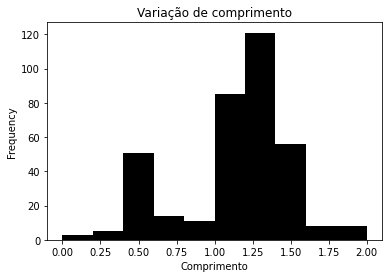

In [21]:
train.groupby('len').mean()['sentiment'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('Variação de comprimento')
plt.xlabel('Comprimento')
plt.show()

Text(0.5, 1.0, 'Palavras que aparecem com mais frequência - Top 30')

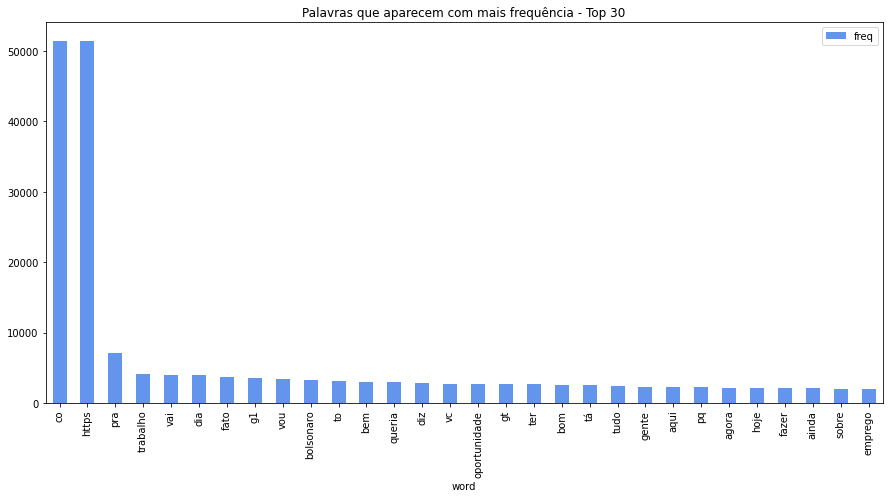

In [60]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words=nltk.corpus.stopwords.words('portuguese'))
words = cv.fit_transform(train.tweet_text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'CornflowerBlue')
plt.title("Palavras que aparecem com mais frequência - Top 30")

Text(0.5, 1.0, 'WordCloud - Postagens de twitter - Tweets ')

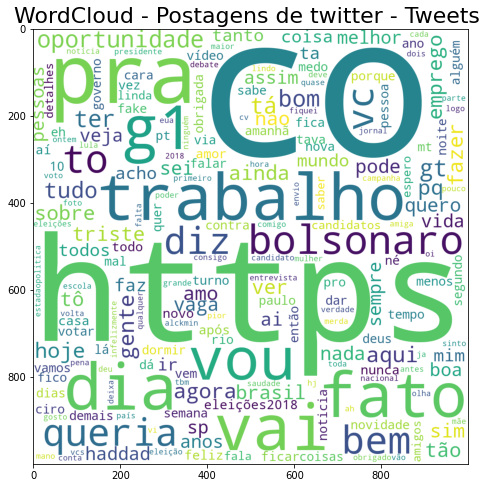

In [64]:
# famoso wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Postagens de twitter - Tweets ", fontsize = 22)

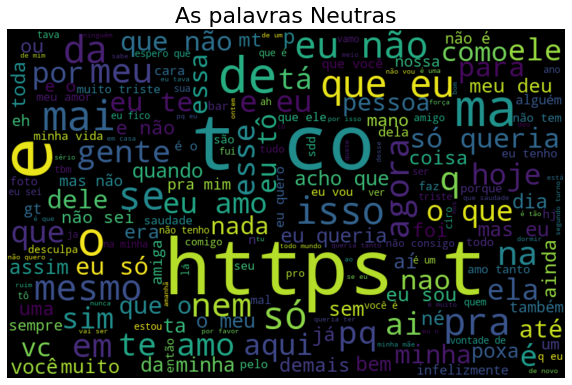

In [67]:
normal_words =' '.join([text for text in train['tweet_text'][train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("As palavras Neutras", fontsize = 22)
plt.show()

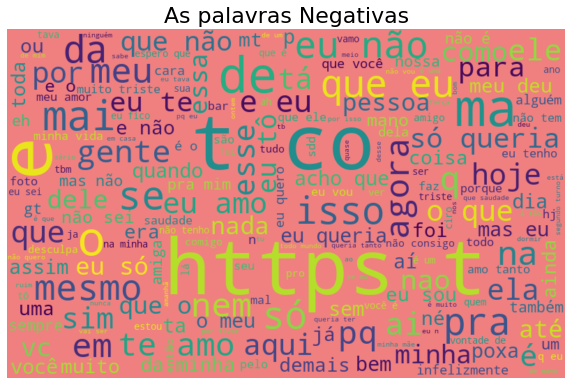

In [70]:
negative_words =' '.join([text for text in train['tweet_text'][train['sentiment'] == 1]])

wordcloud = WordCloud(background_color='LightCoral', width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("As palavras Negativas", fontsize = 22)
plt.show()

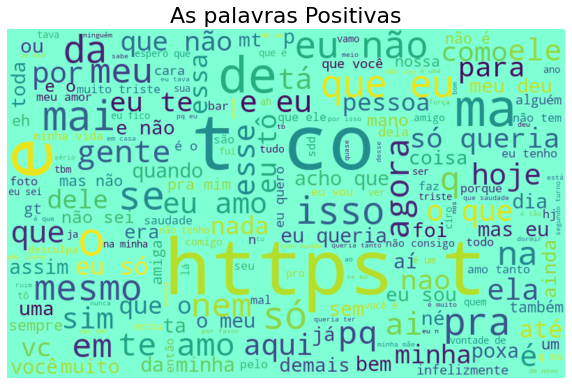

In [120]:
negative_words =' '.join([text for text in train['tweet_text'][train['sentiment'] == 2]])

wordcloud = WordCloud(background_color='Aquamarine', width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("As palavras Positivas", fontsize = 22)
plt.show()

In [71]:
# função para coletar as hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [79]:
# extraindo hashtags de tweets não racistas/sexistas ou neutros
HT_regular = hashtag_extract(train['tweet_text'][train['sentiment'] == 0])

# extraindo hashtags de teets racistas/sexistas
HT_negative = hashtag_extract(train['tweet_text'][train['sentiment'] == 1])

# extraindo hashtags de teets positivos
HT_positive = hashtag_extract(train['tweet_text'][train['sentiment'] == 2])

# desaninhando a lista
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
HT_positive = sum(HT_positive,[])

In [82]:
HT_negative[:5]


['EleNão', 'loveontoptvi', 'passa', 'HaddadPresidente', 'Haddad13']

In [83]:
HT_regular[:5]

['NCT127_Regular_Eng', 'AFazenda10', 'FicaTemer', 'EleNao', 'EleNunca']

In [84]:
HT_positive[:5]

['fato', 'G1', 'fato', 'deiopapo', 'TercaDetremuraSDV']

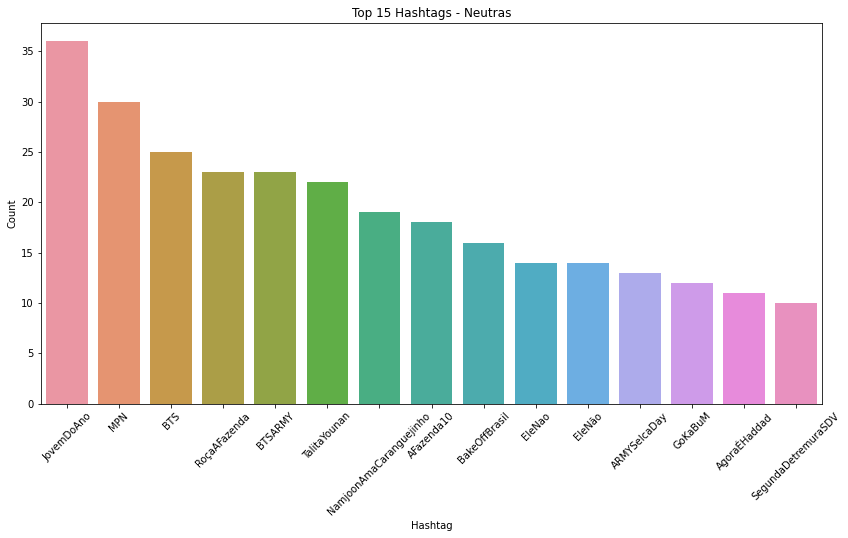

In [107]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecionando as top 15 hashtags   
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(14,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Top 15 Hashtags - Neutras')
plt.xticks(rotation=45)
plt.show()

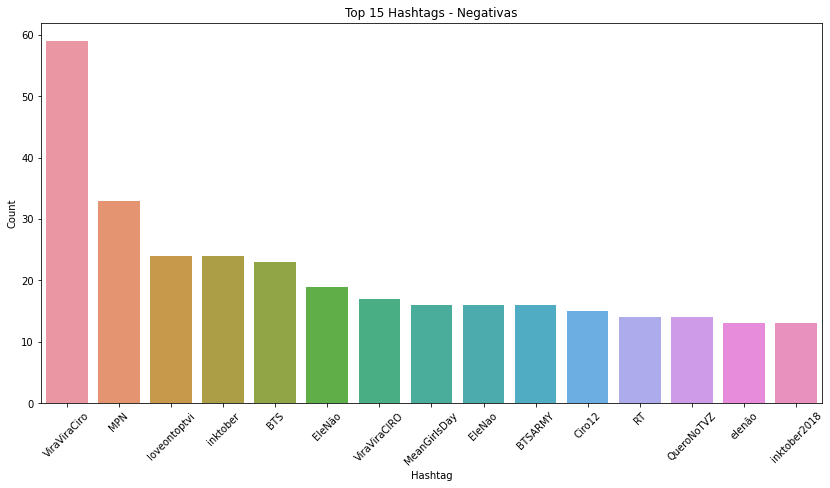

In [109]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecionando as top 15 hashtags   
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(14,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Top 15 Hashtags - Negativas')
plt.xticks(rotation=45)
plt.show()

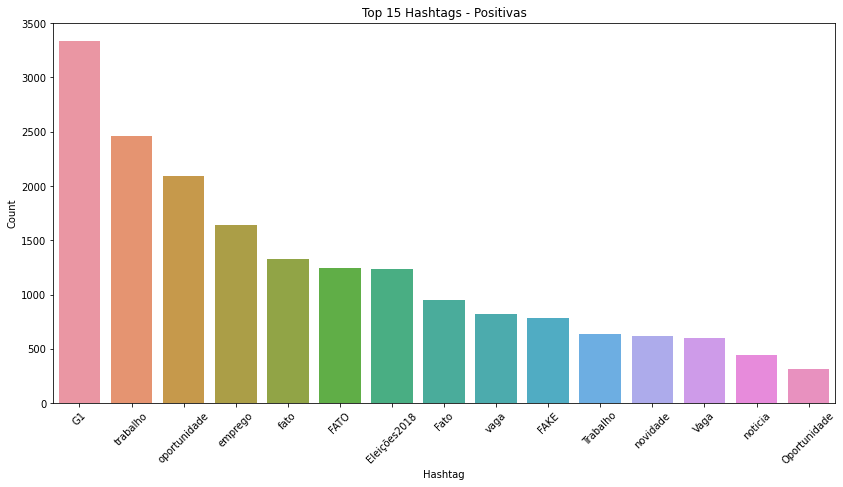

In [110]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecionando as top 15 hashtags   
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(14,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Top 15 Hashtags - Positivas')
plt.xticks(rotation=45)
plt.show()

In [116]:
# tokenizando as palavras presentes no dataset de treino
tokenized_tweet = train['tweet_text'].apply(lambda x: x.split()) 

# importanto gensim
import gensim

# criando um vetor de palavras para nosso modelo
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # número de features/variáveis independentes 
            window=5, # modelo típico usa 5 - 5 words behind and 5 words ahead(10 no total)
            min_count=2,
            sg = 1, # 1 para o modelo skip-gram
            hs = 0,
            negative = 10, # para amostras negativas
            workers= 2, # nº de núcleos
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet_text']), epochs=20)

(20824369, 28437940)

A biblioteca [Gensin](https://pypi.org/project/gensim/), é baseada nas bibliotecas Numpy e Scipy, possui um nível moderado de funcionalidades. No entanto, é conhecida por ser bem otimizada para modelagem não supervisionada de tópicos, análise de similaridade de documentos, modelagem no espaço vetorial e análise semântica robusta.

In [124]:
model_w2v.wv.most_similar(negative = "ódio")

[('#araçatuba', 0.07569504529237747),
 ('https://t.co/iHSV24IOgV', 0.07411208748817444),
 ('lista', 0.0658794566988945),
 ('Esta', 0.05666429176926613),
 ('House', 0.03724832087755203),
 ('loja', 0.03624783828854561),
 ('estrear', 0.03562840819358826),
 ('#futebol', 0.030023973435163498),
 ('VIP', 0.028999323025345802),
 ('adquirir', 0.02629191428422928)]

In [126]:
model_w2v.wv.most_similar(negative = "cancer")

[('https://t.co/iHSV24IOgV', 0.05655914917588234),
 ('https://t.co/Fr5HBYnf9P', 0.0497749000787735),
 ('https://t.co/V3MvuBeA6V', -0.008561423048377037),
 ('Monte', -0.019900990650057793),
 ('#Saúde', -0.027972271665930748),
 ('#Oportunidade', -0.029369736090302467),
 ('➡️', -0.030836261808872223),
 ('#Portugal', -0.03150905296206474),
 ('😉', -0.03197412192821503),
 ('Saiba', -0.03399568051099777)]

In [121]:
model_w2v.wv.most_similar(positive = "amo")

[('@fythxboyz', 0.6486108303070068),
 ('Kids', 0.6416406631469727),
 ('muoto', 0.6388394832611084),
 ('@reajacomamor', 0.6349331140518188),
 ('taetae', 0.6234482526779175),
 ('@destroyfer', 0.622039794921875),
 ('@hobi_petit', 0.6177358031272888),
 ('https://t.co/0Dq3bj3K8z', 0.615774929523468),
 ('@allbtspics', 0.6133970618247986),
 ('💓💓💓', 0.6084920763969421)]

In [127]:
model_w2v.wv.most_similar(positive = "felicidade")

[('aaaf', 0.4811362028121948),
 ('conquista.', 0.4802858233451843),
 ('mesa.', 0.46929317712783813),
 ('banda.', 0.4688044488430023),
 ('adoramos', 0.4667765200138092),
 ('nostalgia.', 0.46564021706581116),
 ('gêmea', 0.4643227159976959),
 ('*Si', 0.46357980370521545),
 ('segue,', 0.4631357789039612),
 ('Preguiça', 0.457988440990448)]

In [132]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [133]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['Rio', 'elege', 'maior', 'bancada', 'policial', 'de', 'sua', 'história', 'https://t.co/sGXnhZKrHx', 'https://t.co/Mcgiz70jPF'], tags=['tweet_0']),
 TaggedDocument(words=['fiquei', 'tão', 'triste', 'quando', 'eu', 'vi', 'o', 'preço', 'da', 'câmera', ':(((('], tags=['tweet_1']),
 TaggedDocument(words=['Para', 'Theresa', 'May,', 'seu', 'plano', 'para', 'o', 'Brexit', 'é', 'a', 'única', 'opção', 'https://t.co/epl39YD9bj'], tags=['tweet_2']),
 TaggedDocument(words=['caralho', 'eu', 'quero', 'proteger', 'a', 'danielly', 'em', 'um', 'pote', 'tadinhaa', ':('], tags=['tweet_3']),
 TaggedDocument(words=['@SiCaetano_', 'viva', 'o', 'caos', ':)'], tags=['tweet_4']),
 TaggedDocument(words=['@ppolkiss', 'Parabéns', 'moço', ':D'], tags=['tweet_5'])]

In [135]:
# removing unwanted patterns from the data


nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Município de
[nltk_data]     Mondaí\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
train_corpus = []

for i in range(0, 95000):
    review = re.sub('[^a-zA-Z]', ' ', train['tweet_text'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('portuguese'))]

    # joining them back with space
    review = ' '.join(review)
    train_corpus.append(review)

In [139]:
test_corpus = []

for i in range(0, 5000):
    review = re.sub('[^a-zA-Z]', ' ', test['tweet_text'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('portuguese'))]

    # joining them back with space
    review = ' '.join(review)
    test_corpus.append(review)

In [140]:
# criando bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(95000, 2500)
(95000,)


In [142]:
# criando bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(5000, 2500)


In [143]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(71250, 2500)
(23750, 2500)
(71250,)
(23750,)


In [146]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [147]:
#aqui
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

MemoryError: could not allocate 18542493696 bytes

In [148]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

MemoryError: Unable to allocate 37.5 GiB for an array with shape (71250, 70734) and data type int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)